In [1]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import random

In [2]:
print(os.getcwd())
os.chdir("../")
dir = "data/"
os.chdir(dir)
print(os.getcwd())

c:\Users\Gian\Documents\_Github\300-Project\gian
c:\Users\Gian\Documents\_Github\300-Project\data


In [3]:
# reading in data
lap_times = pd.read_csv("lap_times.csv")
print(lap_times[:5])
print(max(lap_times['raceId']))
print(len(lap_times))

driver_standings = pd.read_csv("driver_standings.csv")
print(driver_standings[:5])

qualifying = pd.read_csv("qualifying.csv")
print(qualifying[:5])

   raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803
4     841        20    5         1  1:32.342         92342
1086
528785
   driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0
4                  5      18         5     4.0         5            5     0
   qualifyId  raceId  driverId  constructorId  number  position        q1  \
0          1      18         1              1      22         1  1:26.572   
1          2      18    

In [4]:
starting = []

for i in range(1, max(lap_times['raceId'])+1):
    # gets all laps from race
    race = lap_times[lap_times['raceId'] == i]
    # looks for first lap
    start = race[race['lap'] == 1]
    temp = []
    # order by position on first lap
    for j in range(1, len(start)+1):
        temp.append(start[start['position'] == j])
    
    temp2 = []
    # add to starting list
    for j in range(len(temp)):
        temp2.append(temp[j].iloc[0])

    starting.append(temp2)

print(starting[0][0])

raceId                 1
driverId              18
lap                    1
position               1
time            1:35.652
milliseconds       95652
Name: 343770, dtype: object


In [5]:
# extract only the driverId and position
starting_pos = []
for i in range(len(starting)):
    temp = []
    for j in range(len(starting[i])):
        # temp.append([starting[i][j]['driverId'], starting[i][j]['position']])
        temp.append(starting[i][j]['driverId'])
    starting_pos.append(temp)

print(starting_pos[0])

[18, 20, 13, 9, 8, 3, 22, 6, 12, 67, 21, 7, 1, 4, 15, 10, 2, 16, 17]


In [6]:
ending = []
for i in range(1, max(driver_standings['raceId'])+1):
    race = driver_standings[driver_standings['raceId'] == i]

    temp = []
    # order by position on last lap
    for j in range(1, len(race)+1):
        temp.append(race[race['position'] == j])

    temp2 = []
    # add to ending list
    for j in range(len(temp)):
        temp2.append(temp[j].iloc[0])

    ending.append(temp2)

print(ending[0][0])

driverStandingsId    8247
raceId                  1
driverId               18
points               10.0
position                1
positionText            1
wins                    1
Name: 7231, dtype: object


In [7]:
ending_pos = []
for i in range(len(ending)):
    temp = []
    for j in range(len(ending[i])):
        # temp.append([ending[i][j]['driverId'], ending[i][j]['position']])
        temp.append(ending[i][j]['driverId'])
    ending_pos.append(temp)

print(ending_pos[0])

[18, 22, 15, 10, 4, 3, 67, 7, 16, 2, 21, 17, 20, 9, 8]


In [8]:
print(starting_pos[0])
print(starting_pos[0][0])

[18, 20, 13, 9, 8, 3, 22, 6, 12, 67, 21, 7, 1, 4, 15, 10, 2, 16, 17]
18


In [9]:

avg_end = [0] * 20
counts = [0] * 20

c = -1
while True:
    c += 1
    if c % 100 == 0:
        print(c, end = ' ')

    # break if there are no races left
    if len(starting_pos) == 0:
        break
    if len(ending_pos) == 0:
        break

    # get the ith race
    try:
        start = starting_pos[c]
        end = ending_pos[c]
    except:
        break

    changes = []
    for i in range(len(start)):
        # find the driver in the end list
        for j in range(len(end)):
            if start[i] == end[j]:
                # add the change in position
                changes.append(j)
                # print(j)
                try:
                    counts[i] += 1
                except:
                    pass

    # add the change in position to the list
    for i in range(len(changes)):
        try:
            avg_end[i] += changes[i]
        except:
            pass

# divide by the number
for i in range(len(avg_end)):
    avg_end[i] /= counts[i]

print(avg_end)
print(sum(avg_end)/len(avg_end))

0 100 200 300 400 500 600 700 800 900 1000 [1.6625258799171843, 2.854771784232365, 3.8654244306418217, 4.6107660455486545, 5.648760330578512, 6.87991718426501, 8.05625, 8.767782426778243, 9.48125, 10.677148846960169, 11.672268907563025, 11.776371308016877, 12.78343949044586, 13.105708245243129, 14.021367521367521, 14.437632135306554, 15.257019438444924, 15.015486725663717, 15.369668246445498, 14.988980716253444]
10.046626983183625


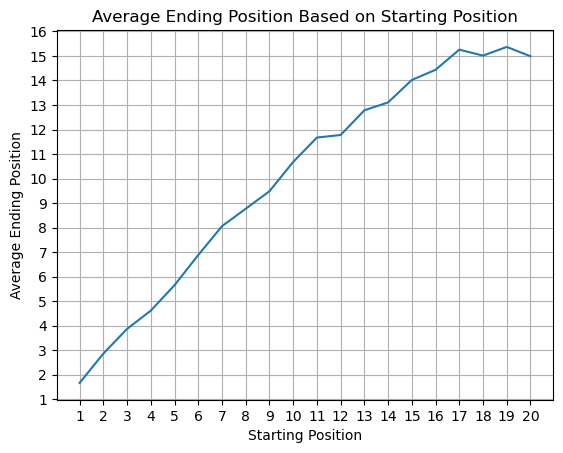

In [10]:
positions = np.linspace(1, 20, 20)
plt.xticks(positions)
plt.yticks(positions)
plt.plot(positions, avg_end[:])
plt.xlabel('Starting Position')
plt.ylabel('Average Ending Position')
plt.title('Average Ending Position Based on Starting Position')
plt.grid()
plt.show()
